**Title**: Leo's Attempts to kill boredom <br>
**Date**: 2022-12-05

## Question 1

In [1]:
library(quantmod)
library(tseries)
library(TSA)
library(lars)
library(randomForest)
library(RColorBrewer)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Loaded lars 1.3


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



#### Selected 10 Stocks from the top 100 constituents by weight in S&P500
1. Apple Inc. (AAPL)
2. Microsoft Corporation (MSFT)
3. Amazon.com Inc. (AMZN)
4. Alphabet Inc. Class A (GOOGL)
5. Tesla Inc (TSLA)
6. NVIDIA Corporation (NVDA)
7. Cola-Cola Company (KO)
8. Walmart Inc. (WMT)
9. Walt Disney Company (DIS)
10. Linde plc (LIN)

Reference: https://www.slickcharts.com/sp500

In [2]:
selected_stocks = c('AAPL','MSFT','AMZN','GOOGL',
                    'TSLA','NVDA','KO','WMT','DIS','LIN')
print(length(selected_stocks))

[1] 10


In [3]:
for (i in 1:length(selected_stocks)){
    tmp_ = selected_stocks[i]
    print(sprintf('Downloading %s stocks... ', tmp_))
    getSymbols(tmp_)
    exec0 = sprintf('%s = %s["2017::2021"]', tmp_, tmp_)
    eval(parse(text=exec0))
    exec1 = sprintf('%s = as.data.frame(%s)', tmp_, tmp_)
    eval(parse(text=exec1))
    exec2 = sprintf('%s.Timestamp = as.numeric(as.Date(rownames(%s)))', tmp_, tmp_)
    eval(parse(text=exec2))
    exec3 = sprintf('%s = cbind(%s.Timestamp, %s)',
                   tmp_, tmp_, tmp_)
    eval(parse(text=exec3))
    exec4 = sprintf('write.table(%s, "project/%s.txt", row.names=FALSE)', tmp_, tmp_)
    eval(parse(text=exec4))
}



[1] "Downloading AAPL stocks... "
[1] "Downloading MSFT stocks... "
[1] "Downloading AMZN stocks... "
[1] "Downloading GOOGL stocks... "
[1] "Downloading TSLA stocks... "
[1] "Downloading NVDA stocks... "
[1] "Downloading KO stocks... "
[1] "Downloading WMT stocks... "
[1] "Downloading DIS stocks... "
[1] "Downloading LIN stocks... "


In [4]:
print(length(DIS))
print(length(AAPL))
print(dim(AAPL))
print(dim(DIS))

[1] 7
[1] 7
[1] 1259    7
[1] 1259    7


In [5]:
getSymbols('^GSPC')
GSPC = GSPC["2017::2021"]
GSPC <- as.data.frame(GSPC)
GSPC.Timestamp <- as.numeric(as.Date(rownames(GSPC)))
GSPC <- cbind(GSPC.Timestamp, GSPC)
write.table(GSPC, "project/GSPC.txt", row.names=FALSE)

[1] "^GSPC"

In [6]:
colnames(DIS)
head(DIS)
tail(DIS)

[1] "DIS.Timestamp" "DIS.Open"      "DIS.High"      "DIS.Low"      
[5] "DIS.Close"     "DIS.Volume"    "DIS.Adjusted"

,DIS.Timestamp,DIS.Open,DIS.High,DIS.Low,DIS.Close,DIS.Volume,DIS.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-03,17169,105.30,106.90,105.21,106.08,8884300,101.5844
2017-01-04,17170,106.64,107.50,106.25,107.44,8322000,102.8867
2017-01-05,17171,107.17,107.62,106.79,107.38,6303000,102.8293
2017-01-06,17172,108.02,109.35,107.75,108.98,9551300,104.3615
2017-01-09,17175,108.58,108.83,108.11,108.36,6195200,103.7677
2017-01-10,17176,107.90,108.82,107.35,108.38,7901900,103.7869


,DIS.Timestamp,DIS.Open,DIS.High,DIS.Low,DIS.Close,DIS.Volume,DIS.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-12-23,18984,152.32,154.19,151.93,153.63,6572400,153.63
2021-12-27,18988,152.88,154.02,151.40,152.80,7762000,152.80
2021-12-28,18989,152.62,156.50,152.41,155.20,12198700,155.20
2021-12-29,18990,154.56,155.92,154.18,154.87,8737000,154.87
2021-12-30,18991,155.71,157.07,155.51,155.93,7228400,155.93
2021-12-31,18992,155.87,156.57,154.74,154.89,6410200,154.89


In [7]:
head(AMZN)
tail(AMZN)

,AMZN.Timestamp,AMZN.Open,AMZN.High,AMZN.Low,AMZN.Close,AMZN.Volume,AMZN.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-03,17169,37.8960,37.9380,37.3850,37.6835,70422000,37.6835
2017-01-04,17170,37.9195,37.9840,37.7100,37.8590,50210000,37.8590
2017-01-05,17171,38.0775,39.1200,38.0130,39.0225,116602000,39.0225
2017-01-06,17172,39.1180,39.9720,38.9240,39.7995,119724000,39.7995
2017-01-09,17175,39.9000,40.0885,39.5885,39.8460,68922000,39.8460
2017-01-10,17176,39.8300,39.9000,39.4770,39.7950,51168000,39.7950


,AMZN.Timestamp,AMZN.Open,AMZN.High,AMZN.Low,AMZN.Close,AMZN.Volume,AMZN.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-12-23,18984,170.4280,171.975,170.1500,171.0685,36788000,171.0685
2021-12-27,18988,171.0370,172.943,169.2155,169.6695,58688000,169.6695
2021-12-28,18989,170.1825,172.176,169.1355,170.6610,54638000,170.6610
2021-12-29,18990,170.8400,171.212,168.6005,169.2010,35754000,169.2010
2021-12-30,18991,169.7000,170.888,168.5240,168.6445,37584000,168.6445
2021-12-31,18992,168.9560,169.350,166.5585,166.7170,47830000,166.7170


In [8]:
read.bossa.data <- function(vec.names) {
    # vec.names = c('a','b')
    p <- length(vec.names)
    # p = 2
    n1 <- 20000
    dates <- matrix(99999999, p, n1)
    closes <- matrix(0, p, n1)
    max.n2 <- 0

    for (i in 1:p) {
      filename <- paste("project/",vec.names[i], ".txt", sep="")
      tmp <- scan(filename, list(date=numeric(), NULL, NULL, NULL, close=numeric(), NULL, NULL), skip=1, sep="")
      n2 <- length(tmp$date)
      max.n2 <- max(n2, max.n2)
      dates[i,1:n2] <- tmp$date
      closes[i,1:n2] <- tmp$close
    }

    dates <- dates[,1:max.n2]
    closes <- closes[,1:max.n2]

    days <- rep(0, n1) # 1x20000
    arranged.closes <- matrix(0, p, n1) # 11x20000
    date.indices <- starting.indices <- rep(1, p) # 1x11
    already.started <- rep(0, p) # (1x11)
    day <- 1

    # max.n2 maximum number of dates 12589
    while(max(date.indices) <= max.n2) {
      current.dates <- current.closes <- rep(0, p) # 1x11
      for (i in 1:p) { # scan through each stock
        current.dates[i] <- dates[i,date.indices[i]]
        current.closes[i] <- closes[i,date.indices[i]]
      }
        # current.dates = [17160, 17169,17163, 17159]
        # current.closes = [1.1,2.1,3.1, 0.1]
        # 4
      min.indices <- which(current.dates == min(current.dates))
      days[day] <- current.dates[min.indices[1]]
        # days 17159 0 0 0 ...
        # arranged.closes
        # 0 0 0 0 ...
        # 0 0 0 0 ...
        # 0 0 0 0 ...
        # 0.1 0 0 0 ...
      arranged.closes[min.indices,day] <- log(current.closes[min.indices])
      arranged.closes[-min.indices,day] <- arranged.closes[-min.indices, max(day-1, 1)]
      already.started[min.indices] <- 1
      starting.indices[-which(already.started == 1)] <- starting.indices[-which(already.started == 1)] + 1
      day <- day + 1
      date.indices[min.indices] <- date.indices[min.indices] + 1
    }


    days <- days[1:(day-1)]
    arranged.closes <- arranged.closes[,1:(day-1)]
    max.st.ind <- max(starting.indices)
    r <- matrix(0, p, (day-max.st.ind-1))

    for (i in 1:p) {
      r[i,] <- diff(arranged.closes[i,max.st.ind:(day-1)])
      r[i,] <- r[i,] / sqrt(var(r[i,]))
      r[i,r[i,]==0] <- rnorm(sum(r[i,]==0))
    }

    return(list(dates=dates, closes=closes, days=days, arranged.closes=arranged.closes, starting.indices=starting.indices, r=r))
  }

$$r_t = p_t-p_{t-1}$$
$$r_t = \frac{r_t}{\sqrt{(\sigma^2)}}$$
$$$$

In [9]:
selected_stocks <- c(selected_stocks,'GSPC')
print(selected_stocks)

 [1] "AAPL"  "MSFT"  "AMZN"  "GOOGL" "TSLA"  "NVDA"  "KO"    "WMT"   "DIS"  
[10] "LIN"   "GSPC" 


In [10]:
ind = read.bossa.data(selected_stocks)

In [11]:
date <- ind$date
logprice <- log(ind$close)
print(dim(date))
print(dim(logprice))
print(dim(logprice)[2])

[1]   11 1259
[1]   11 1259
[1] 1259


In [12]:
n <- length(selected_stocks)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'seq',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
colors = sample(col_vector, n)

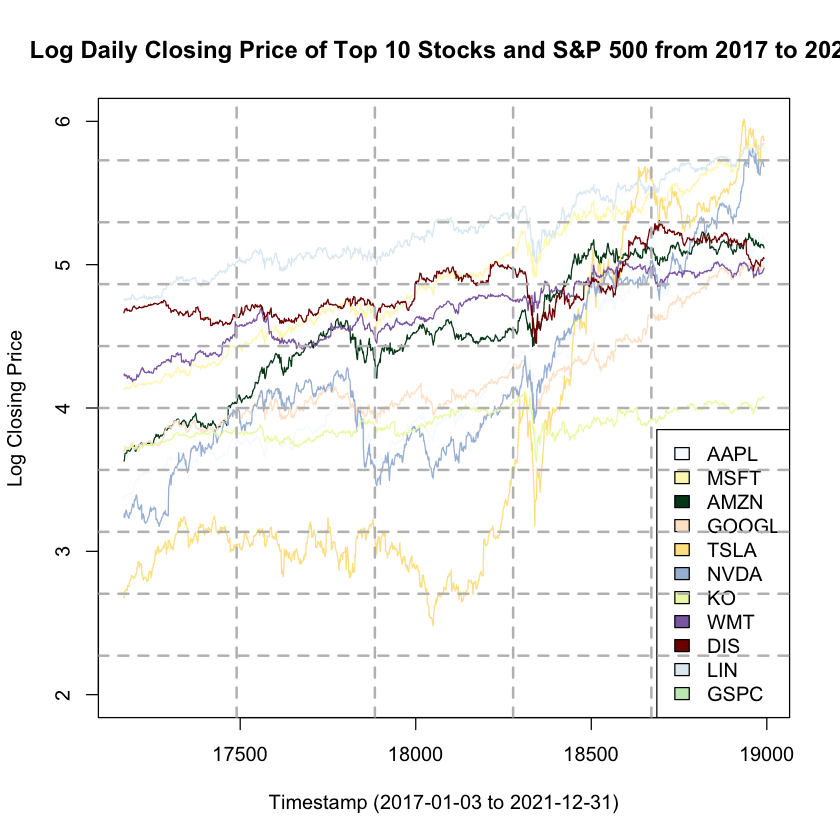

In [13]:
plot(date[1,], logprice[1,], 
    main="Log Daily Closing Price of Top 10 Stocks and S&P 500 from 2017 to 2021",
    ylab="Log Closing Price",
    xlab="Timestamp (2017-01-03 to 2021-12-31)",
    ylim=c(2,6),
    xlim=c(date[1,1],date[1,dim(date)[2]]),
    type="l",
    col=colors[1])
for (i in 2:length(selected_stocks)){
    lines(date[i,], logprice[i,], col=colors[i])
}
legend("bottomright", selected_stocks, fill=colors)
grid(nx = 5,
     ny = 10,
     lty = 2, col = "gray", lwd = 2)

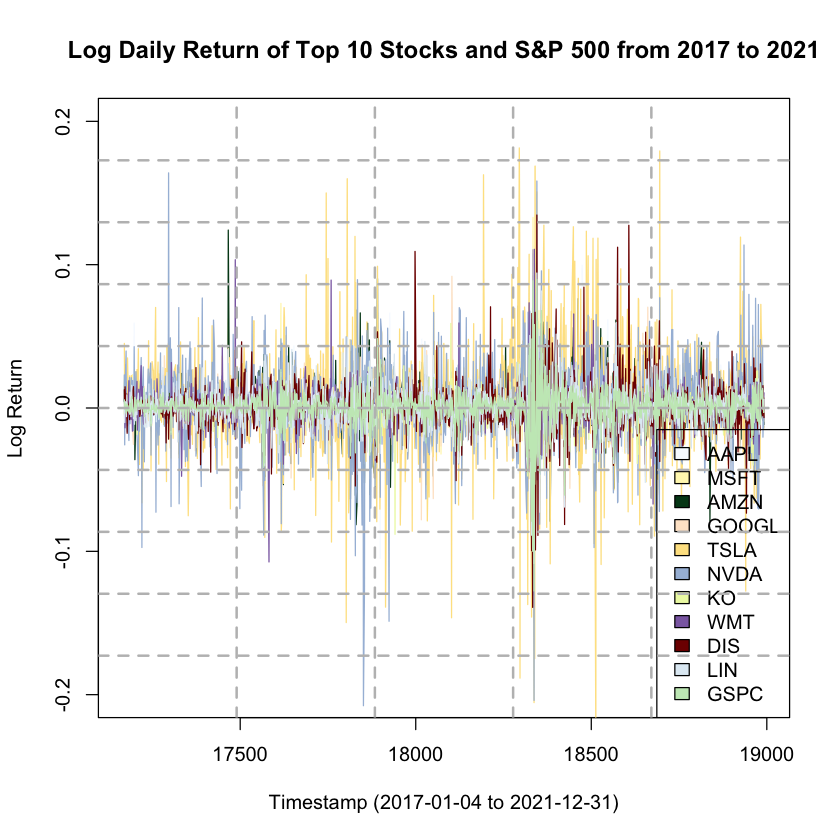

In [14]:
logreturn = t(diff(t(logprice)))
plot(date[1,2:dim(date)[2]], logreturn[1,], 
    main="Log Daily Return of Top 10 Stocks and S&P 500 from 2017 to 2021",
    ylab="Log Return",
    xlab="Timestamp (2017-01-04 to 2021-12-31)",
    ylim=c(-0.2,0.2),
    xlim=c(date[1,1],date[1,dim(date)[2]]),
    type="l",
    col=colors[1])
for (i in 2:length(selected_stocks)){
    lines(date[1,2:dim(date)[2]], logreturn[i,], col=colors[i])
}
legend("bottomright", selected_stocks, fill=colors)
grid(nx = 5, ny = 10,
     lty = 2, col = "gray", lwd = 2)

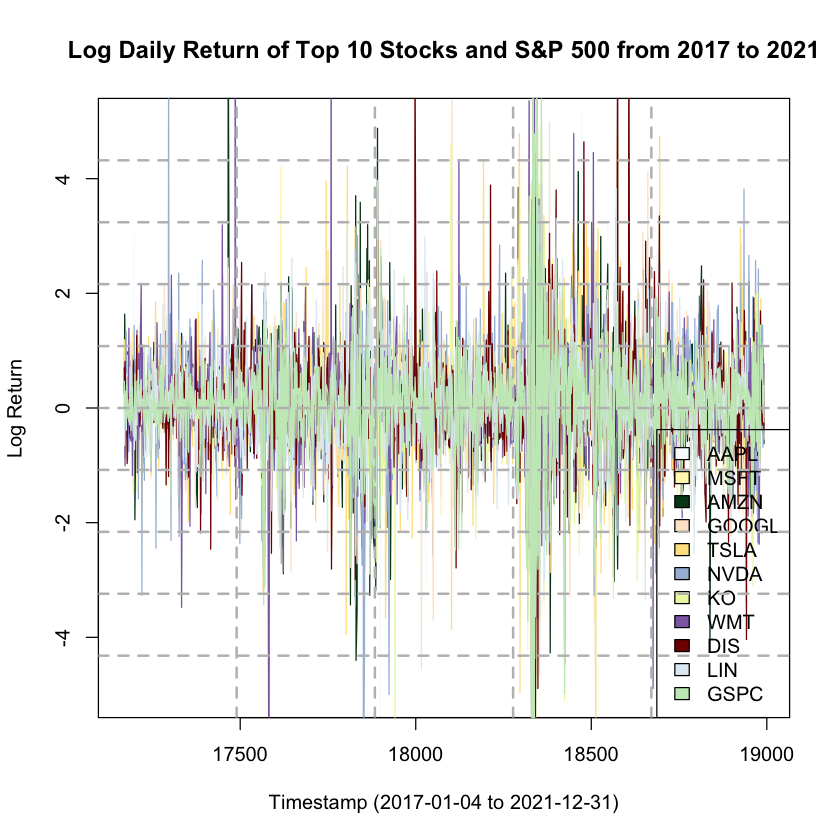

In [15]:
plot(date[1,2:dim(date)[2]], ind$r[1,], 
    main="Log Daily Return of Top 10 Stocks and S&P 500 from 2017 to 2021",
    ylab="Log Return",
    xlab="Timestamp (2017-01-04 to 2021-12-31)",
    ylim=c(-5,5),
    xlim=c(date[1,1],date[1,dim(date)[2]]),
    type="l",
    col=colors[1])
for (i in 2:length(selected_stocks)){
    lines(date[1,2:dim(date)[2]], ind$r[i,], col=colors[i])
}
legend("bottomright", selected_stocks, fill=colors)
grid(nx = 5, ny = 10,
     lty = 2, col = "gray", lwd = 2)

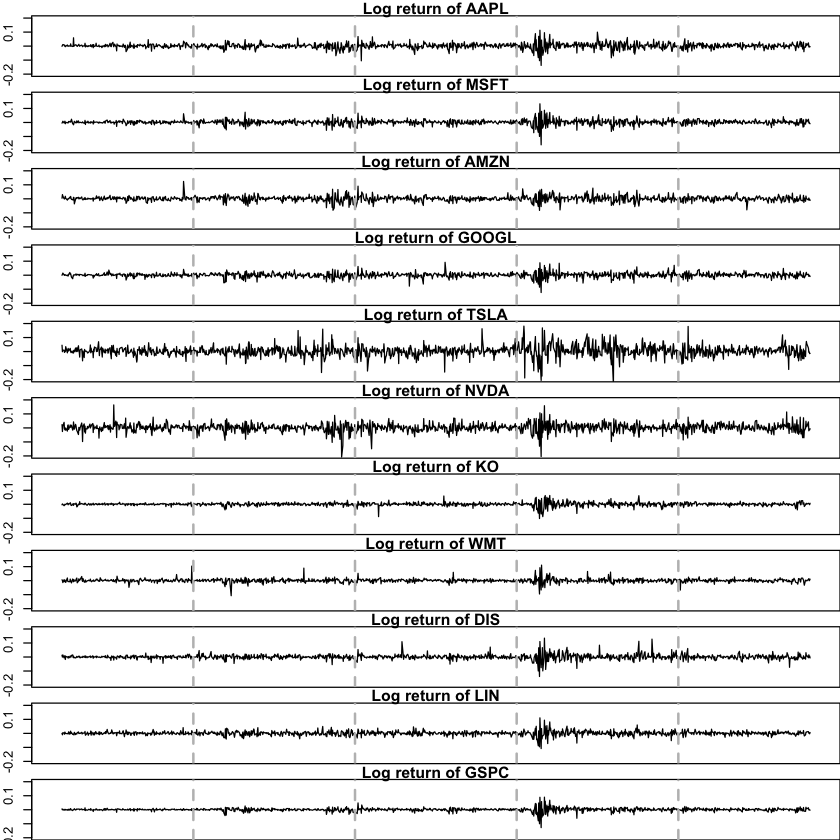

In [16]:
par(mar=c(0,2,1,0),mfrow=c(11,1))
for (i in 1:11){
    plot(date[i,2:dim(date)[2]], logreturn[i,], 
            main=sprintf("Log return of %s",selected_stocks[i]),
            ylab="",
            xlab="",
            ylim=c(-0.2,0.2),
            xlim=c(date[1,1],date[1,dim(date)[2]]),
            type="l",
            xaxt='n')
    grid(nx = 5, ny = NA,
     lty = 2, col = "gray", lwd = 2)
#     if (i==11) {
#         par(mar=c(0,2,1,0))
#         plot(date[i,2:dim(date)[2]], logreturn[i,], 
#             main=sprintf("Log return of %s",selected_stocks[i]),
#             ylab="",
#             xlab="Timestamp (2017-01-04 to 2021-12-31)",
#             ylim=c(-0.2,0.2),
#             xlim=c(date[1,1],date[1,dim(date)[2]]),
#             type="l")
#     } else {
        
#     }
}

## Question 2

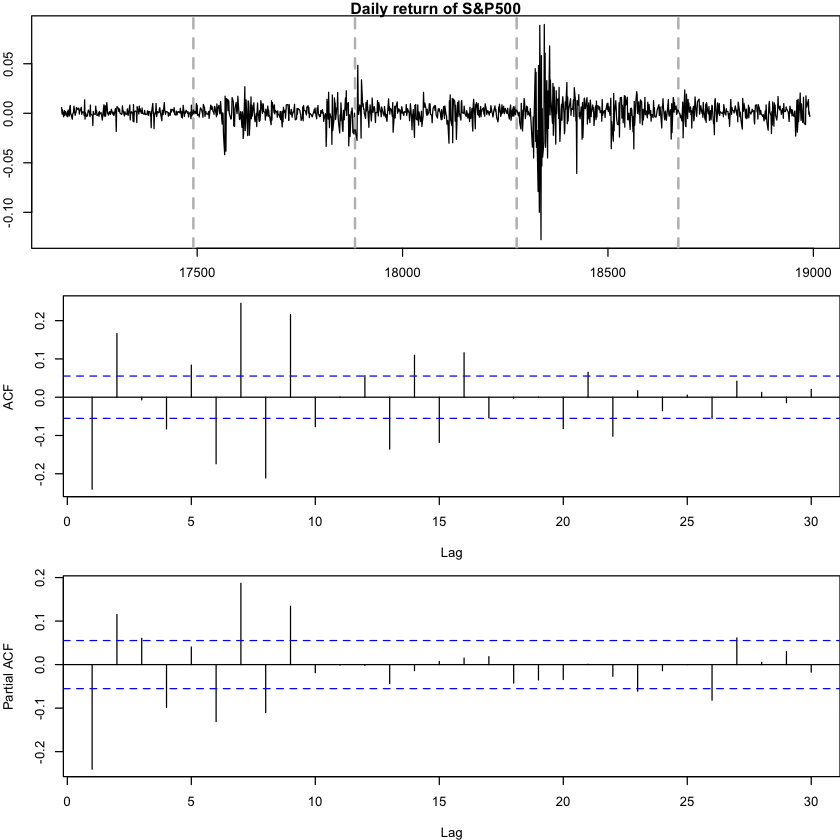

In [17]:
d = dim(date)
# print(d)
par(mar=c(2,2,1,0),mfrow=c(3,1));
plot(date[d[1],2:d[2]],logreturn[d[1],],
     ylab="Log return",xlab="",type='l',
     main="Daily return of S&P500")
grid(nx = 5, ny = NA,
     lty = 2, col = "gray", lwd = 2)

par(mar=c(4,4,1,0))
acfgraph <- acf(logreturn[d[1],], plot=FALSE)
plot(acfgraph, main='')
par(mar=c(4,4,1,0))
pacfgraph <- pacf(logreturn[d[1],], plot=FALSE)
plot(pacfgraph, main='')

I will choose max lag = 9 as lag 1 through 9 fall outside the intervals of 'no correlation'. 

Reference: https://www.kaggle.com/code/ryanholbrook/time-series-as-features

The shift indices are chosen to be all zeros since all 10 stocks are publicly traded under S&P500, there are no delays for them.

In [18]:
pred.footsie.prepare <- function(max.lag = 5, split = c(50, 25), mask = rep(1, 10)) {
    # this function prepares the data for the prediction exercise and splits them into a train, validation and test sets
    # max.lag - the maximum FT-SE100 lag to include in the prediction
    # split - how much of the data (in percentage terms) to include in the training and validation sets, respectively
    # mask - which other indices to include (1 for yes, 0 for no)

    ind <- read.bossa.data(c('GSPC','AAPL','MSFT','AMZN','GOOGL',
                'TSLA','NVDA','KO','WMT','DIS','LIN'))
    d <- dim(ind$r)
    # 11x1258
    start.index <- max(3, max.lag + 1)
    # lag=9, start.index=10
    
    # y [1249,1]
    y <- matrix(0, d[2] - start.index + 1, 1)
    # x [1249,19] q+10
    x <- matrix(0, d[2] - start.index + 1, d[1] - 1 + max.lag)
    # 10 to 1258
    y[,1] <- ind$r[1,start.index:d[2]]

    # i from 1 to 9
    for (i in 1:max.lag) {
        # 9 to1257  ind.r > column 1 x
        # 8 to1256 > column 2
        # ...
        # 1 to1249 > column 9
        x[,i] <- ind$r[1,(start.index-i):(d[2]-i)]
    }
    ##[9, 8, 7, 6, 5, 4, 3, 2, 1]
    ##[10, 9, ....., 2]
    ##[11, ....3]
    ##...
    ##[1257, ... 1249]

#     shift.indices <- c(0, 1, 1, 0, 0, 1, 0, 1, 0, 1) # 10 elements
    shift.indices <- c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
#     shift.indices <- mask
    ## For American and Latin American exchanges, we look at data up to t-1 if t is current time

    # i from 2 to 11
    for (i in 2:(d[1])) {
        # i=2, col 10 < (2nd row , 9 to 1257 cols)
        # i=3, col 11 < (3rd row, 9 to 1257 cols)
        # i=4, ...
        # i=11, col 19 < ()
        x[,i+max.lag-1] <- ind$r[i,(start.index-1-shift.indices[i-1]):(d[2]-1-shift.indices[i-1])]
    }

    end.training <- round(split[1] / 100 * d[2])
    end.validation <- round(sum(split[1:2]) / 100 * d[2])
    x <- x[,as.logical(c(rep(1, max.lag), mask))]
    
    y.train <- as.matrix(y[1:end.training], end.training, 1)
    x.train <- x[1:end.training,]

    y.valid <- as.matrix(y[(end.training+1):(end.validation)], end.validation-end.training, 1)
    x.valid <- x[(end.training+1):(end.validation),]

    y.test <- as.matrix(y[(end.validation+1):(d[2] - start.index + 1)], d[2]-start.index-end.validation+1, 1)
    x.test <- x[(end.validation+1):(d[2] - start.index + 1),]

    list(x=x, y=y, x.train=x.train, y.train=y.train, x.valid=x.valid, y.valid=y.valid, x.test=x.test, y.test=y.test)

}


### Why minimising RSS is equivalent to maximising likelihood?
#### Residual Sum Square
$$RSS = \sum_i^N (y_i-w^\top x_i)^2$$
You try to minimize this thing, such that your prediction $w^\top x$ is as close as the true observation $y$
Assume that $y_i=w^\top x_i +\epsilon$ and $\epsilon \sim \mathcal{N}(0,\sigma^2)$

#### Likelihood
$$p(y|X,w)=\prod^N_i \mathcal{N}(y_i-w^\top x_i,\sigma^2)\approx \prod^N_i \exp(-\frac{1}{2}(y_i-w^\top x_i)^2/\sigma^2)$$
$$\log p(y|X,w) = \log exp(-\frac{1}{2}\sum^N_{i}(y_i-w^\top x_i)^2/\sigma^2) \approx -\sum^N_{i}(y_i-w^\top x_i)^2/\sigma^2$$

#### Lag?
$$s_{t+\tau}=s_t$$

#### Window size?
$$X = (x_0,x_1,x_2,...x_N)$$
$$X' = (x_2'=\frac{x_1+x_2+x_3}{3},x_3'=\frac{x_2+x_3+x_4}{3},...)$$

### The linear regression model with time-varying coefficients

$$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\sum^{10}_{i=1}\gamma_iZ^i_t+\tilde{\epsilon}_{t+1}$$

$$\begin{pmatrix}
Y_{10}\\
Y_{11}\\
\vdots\\
Y_{1258}
\end{pmatrix}=\begin{pmatrix}
Y_9 & \cdots & Y_1 & Z_9^1  & \cdots & Z_9^{10}  \\
Y_{10} &  \cdots & Y_2 & Z_{10}^1  & \cdots & Z_{10}^{10}\\
\vdots & & \vdots && \ddots  & \vdots \\
Y_{1257}   & \cdots & Y_{1249} & Z_{1257}^1  & \cdots & Z_{1257}^{10}\\
\end{pmatrix}\begin{pmatrix}
\beta_1 \\
\beta_2 \\
\beta_3 \\
\vdots \\
\beta_9 \\
\gamma_1 \\
\gamma_2 \\
\vdots \\
\gamma_{10}
\end{pmatrix}+ \gamma_0 + \begin{pmatrix}
\tilde{\epsilon}_{10} \\
\tilde{\epsilon}_{11} \\
\vdots \\
\tilde{\epsilon}_{1258} \\
\end{pmatrix}$$
where $Z^k_t$ k-th stock price at time t (the superscript is not the power of the feature).

With no lag, 
$$\begin{pmatrix}
Y_{t-D+1}\\
Y_{t-D+2}\\
\vdots \\
Y_{t}\end{pmatrix}= \begin{pmatrix}
1 & Z_{t-D} & Z^2_{t-D} & \cdots Z^{q+10}_{t-D} \\
1 & Z_{t-D+1} & Z^2_{t-D+1} & \cdots Z^{q+10}_{t-D+1} \\
\vdots \\
1 & Z_{t-1} & Z^2_{t-1} & \cdots Z^{q+10}_{t-1} \\
\end{pmatrix}\begin{pmatrix}
\alpha_0 \\ \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_{q+10}
\end{pmatrix} + e
$$

$$Y_{t-D+1} = \alpha_0 + \alpha_1 Z_{t-D} + \alpha_2 Z_{t-D}^2 + \cdots + \alpha_{q+10} Z_{t-D}^{q+10} + e$$

In [19]:
vol.exp.sm <- function(x, lambda) {

    # Exponential smoothing of x^2 with parameter lambda

    sigma2 <- x^2
    n <- length(x)

    for (i in 2:n)
        sigma2[i] <- sigma2[i-1] * lambda + x[i-1]^2 * (1-lambda)
    # page 52 equation 3.3
    sigma <- sqrt(sigma2)

    resid <- x/sigma
    resid[is.na(resid)] <- 0
    sq.resid <- resid^2

    list(sigma2=sigma2, sigma=sigma, resid = resid, sq.resid = sq.resid)

}

In [20]:
first.acf.squares.train <- function(x, lambda) {
# x is an object returned by "pred.footsie.prepare"
# this function computes the volatility for each covariate and the response in the training part
# it then computes the acfs of the squared residuals after removing the volatility, and adds up
# the first acfs for each covariate and response
# the point is to choose lambda so that as much as possible of the acf has been removed

    d <- dim(x$x.train)

    ss <- 0

    x.train.dev <- x$x.train
    y.train.dev <- x$y.train

    x.valid.dev <- x$x.valid
    y.valid.dev <- x$y.valid

    x.test.dev <- x$x.test
    y.test.dev <- x$y.test


    for (i in 1:(d[2])) {
        v <- vol.exp.sm(x$x.train[,i], lambda)
        ss <- ss + abs(acf(v$sq.resid, plot=FALSE)$acf[2])
        x.train.dev[,i] <- v$resid

        v <- vol.exp.sm(x$x.valid[,i], lambda)
        x.valid.dev[,i] <- v$resid

        v <- vol.exp.sm(x$x.test[,i], lambda)
        x.test.dev[,i] <- v$resid

    }

    v <- vol.exp.sm(x$y.train, lambda)
    ss <- ss + abs(acf(v$sq.resid, plot=FALSE)$acf[2])
    y.train.dev <- v$resid

    v <- vol.exp.sm(x$y.valid, lambda)
    y.valid.dev <- v$resid

    v <- vol.exp.sm(x$y.test, lambda)
    y.test.dev <- v$resid

    list(ss=ss, y.train.dev=y.train.dev, x.train.dev=x.train.dev, y.valid.dev=y.valid.dev, x.valid.dev=x.valid.dev, y.test.dev=y.test.dev, x.test.dev=x.test.dev)

}

In [21]:
try_lambda <- function(data) {
    lambda_x = seq(0.01,0.99,0.01)
    lambda_ss = c()
    for (j in 1:length(lambda_x)){
        tmp_ss = first.acf.squares.train(data, lambda_x[j])$ss
        lambda_ss = c(lambda_ss,tmp_ss)
    }
    print(sprintf('lambda: %s, min ss: %s', 
        lambda_x[which.min(lambda_ss)],
        min(lambda_ss)))
    list(xs=lambda_x, sss=lambda_ss, best=lambda_x[which.min(lambda_ss)])
}

#### Exponential Smoothing
- https://en.wikipedia.org/wiki/Exponential_smoothing

[1] "lambda: 0.89, min ss: 0.272211434548705"
[1] "Estimating AAPL ... "
[1] "lambda: 0.01, min ss: 0.092195196042605"
[1] "Estimating MSFT ... "
[1] "lambda: 0.93, min ss: 0.0728460971233985"
[1] "Estimating AMZN ... "
[1] "lambda: 0.85, min ss: 0.0856518152460292"
[1] "Estimating GOOGL ... "
[1] "lambda: 0.93, min ss: 0.0296372197308251"
[1] "Estimating TSLA ... "
[1] "lambda: 0.93, min ss: 0.0351244482375862"
[1] "Estimating NVDA ... "
[1] "lambda: 0.93, min ss: 0.112962118544022"
[1] "Estimating KO ... "
[1] "lambda: 0.85, min ss: 0.0685407615311524"
[1] "Estimating WMT ... "
[1] "lambda: 0.01, min ss: 0.101025373448426"
[1] "Estimating DIS ... "
[1] "lambda: 0.93, min ss: 0.0187861652604094"
[1] "Estimating LIN ... "
[1] "lambda: 0.87, min ss: 0.0433563435979453"


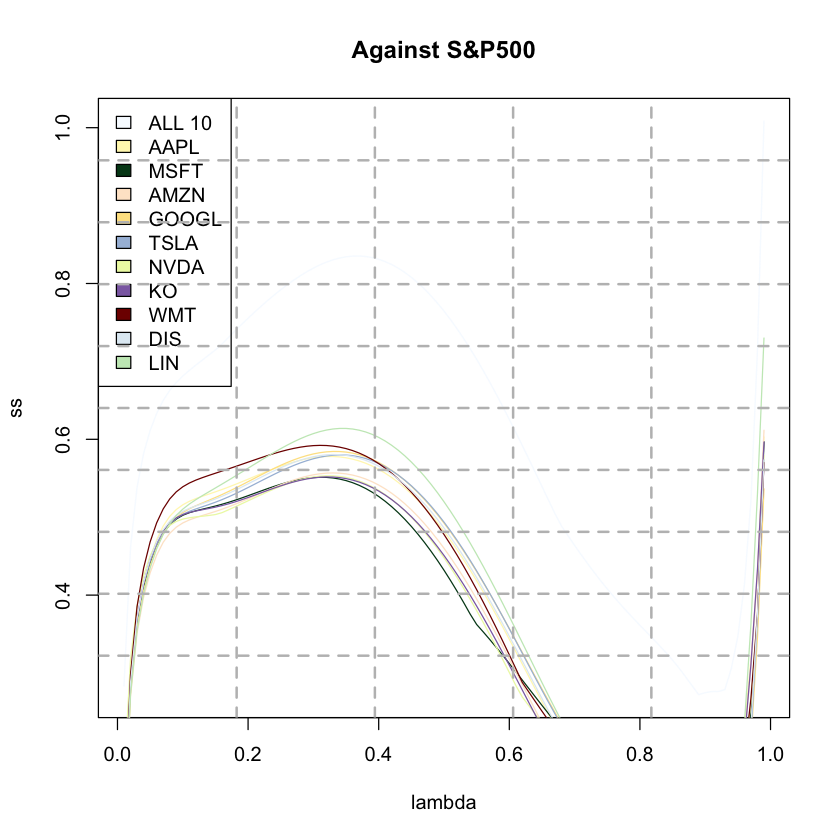

In [22]:
data = pred.footsie.prepare(max.lag=9)
lambda_all = try_lambda(data)

plot(lambda_all$xs,lambda_all$sss,type='l',
     xlab='lambda',ylab='ss',
     main='Against S&P500',
     col=colors[1])

best_lambdas = c(lambda_all$best)
for (i in 1:10) { # skip GSPC
    stock = selected_stocks[i]
    print(sprintf('Estimating %s ... ', stock))
    tmp_mask = as.numeric(selected_stocks[1:10]==stock)
    tmp = pred.footsie.prepare(max.lag=9,mask=tmp_mask)
    lambda_exp = try_lambda(tmp)
    lines(lambda_exp$xs, lambda_exp$sss, col=colors[i+1])
    best_lambdas = c(best_lambdas,lambda_exp$best)
}
legend("topleft", c('ALL 10', 
    selected_stocks[1:10]), fill=colors)
grid(nx = 5,
     ny = 10,
     lty = 2, col = "gray", lwd = 2)

In [23]:
selected_stocks[1:10]

[1] "AAPL"  "MSFT"  "AMZN"  "GOOGL" "TSLA"  "NVDA"  "KO"    "WMT"   "DIS"  
[10] "LIN"

The assumed model for each time series is given by, 
1. Apple Inc. (AAPL)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_1Z^1_t+\tilde{\epsilon}_{t+1}$$
2. Microsoft Corporation (MSFT)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_2Z^2_t+\tilde{\epsilon}_{t+1}$$
3. Amazon.com Inc. (AMZN)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_3Z^3_t+\tilde{\epsilon}_{t+1}$$
4. Alphabet Inc. Class A (GOOGL)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_4Z^4_t+\tilde{\epsilon}_{t+1}$$
5. Tesla Inc (TSLA)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_5Z^5_t+\tilde{\epsilon}_{t+1}$$
6. NVIDIA Corporation (NVDA)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_6Z^6_t+\tilde{\epsilon}_{t+1}$$
7. Cola-Cola Company (KO)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_7Z^7_t+\tilde{\epsilon}_{t+1}$$
8. Walmart Inc. (WMT)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_8Z^8_t+\tilde{\epsilon}_{t+1}$$
9. Walt Disney Company (DIS)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_9Z^9_t+\tilde{\epsilon}_{t+1}$$
10. Linde plc (LIN)
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\gamma_{10}Z^{10}_t+\tilde{\epsilon}_{t+1}$$
11. S&P 500 Against all 10 stocks
    $$\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\sum^{10}_{i=1}\gamma_iZ^i_t+\tilde{\epsilon}_{t+1}$$


In [24]:
m = first.acf.squares.train(data, 0.87)

In [25]:
ls(m)

[1] "ss"          "x.test.dev"  "x.train.dev" "x.valid.dev" "y.test.dev" 
[6] "y.train.dev" "y.valid.dev"

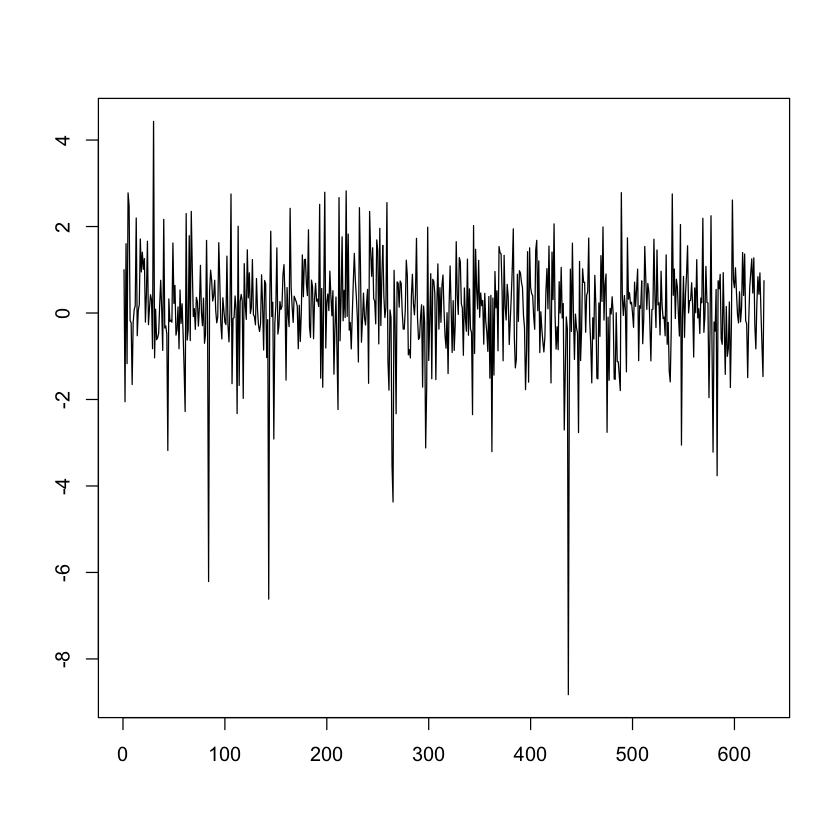

In [26]:
plot(m$y.train.dev, type='l', ylab='', xlab='')

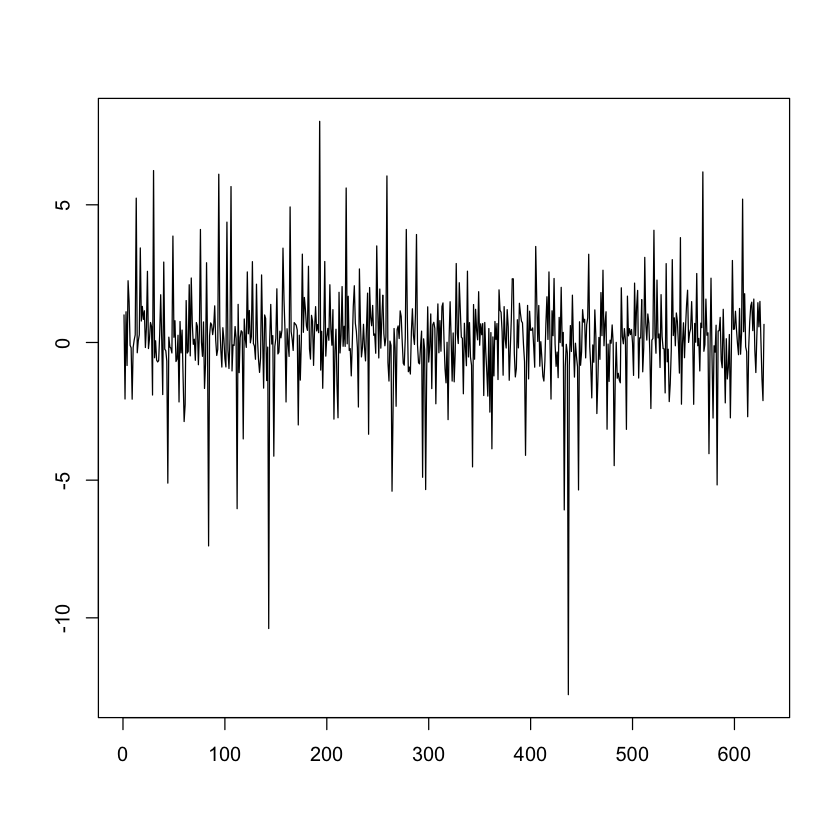

In [27]:
plot(first.acf.squares.train(data, 0.4)$y.train.dev, 
     type='l', ylab='', xlab='')

## Question 3
1. Start from a certain $t=t_0$. Fix D. We can rewrite the linear regression model with time-varying coefficients from $\tilde{Y}_{t+1}=\sum^q_{j=1}\beta_j\tilde{Y}_{t-j+1}+\gamma_0+\sum^{10}_{i=1}\gamma_iZ^i_t+\tilde{\epsilon}_{t+1}$ to
    $$\begin{align}\mathbf{Y}&=\mathbf{Z}\mathbf{\alpha}+\mathbf{e}\\
    \begin{pmatrix}
Y_{10}\\
Y_{11}\\
\vdots\\
Y_{1258}
\end{pmatrix}&=\begin{pmatrix}
Y_9 & \cdots & Y_1 & Z_9^1  & \cdots & Z_9^{10}  \\
Y_{10} &  \cdots & Y_2 & Z_{10}^1  & \cdots & Z_{10}^{10}\\
\vdots & & \vdots && \ddots  & \vdots \\
Y_{1257}   & \cdots & Y_{1249} & Z_{1257}^1  & \cdots & Z_{1257}^{10}\\
\end{pmatrix}\begin{pmatrix}
\beta_1 \\
\beta_2 \\
\beta_3 \\
\vdots \\
\beta_9 \\
\gamma_1 \\
\gamma_2 \\
\vdots \\
\gamma_{10}
\end{pmatrix}+ \gamma_0 + \begin{pmatrix}
\tilde{\epsilon}_{10} \\
\tilde{\epsilon}_{11} \\
\vdots \\
\tilde{\epsilon}_{1258} \\
\end{pmatrix}\end{align}$$